In [1]:

import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt


C:\Users\Vedant\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(r"C:\Users\Vedant\Downloads\titanic.csv")
print(df.columns)
print(df.head())


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Gender'] = df['Sex'].map({'male': 0, 'female': 1})
df.drop(['Sex'], axis=1, inplace=True)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked  Gender  
0         A/5 21171   7.2500   NaN        S       0  
1          PC 17599  71.2833   C85        C       1  
2  STON/O2. 3101282   7.9250   NaN        S       1  
3            113803  53.1000  C123        S       1  
4            373450   8.0500   NaN        S       0  


C:\Users\Vedant\AppData\Local\Temp\ipykernel_27128\164747860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [4]:
hc = HillClimbSearch(df)
model = hc.estimate(scoring_method=BicScore(df))
bayes_net = BayesianNetwork(model.edges())
bayes_net.fit(df)


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 8/1000000 [00:00<29:10:20,  9.52it/s] 


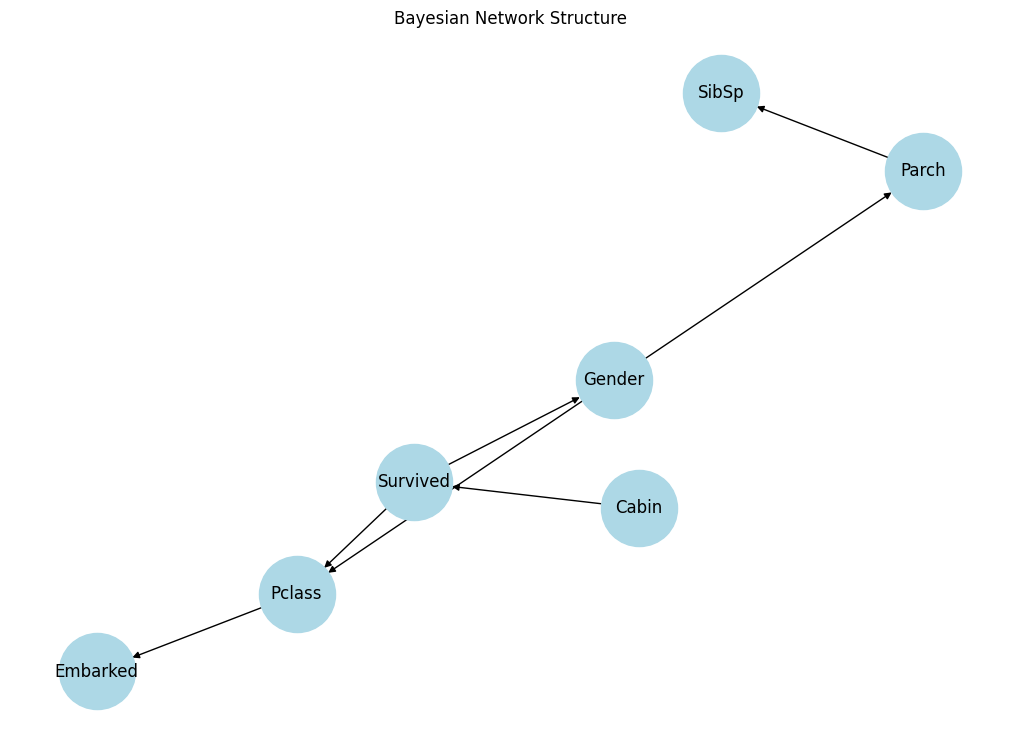

In [5]:
nx_graph = nx.DiGraph(bayes_net.edges())  # Convert the network to a NetworkX directed graph
plt.figure(figsize=(10, 7))
nx.draw(nx_graph, with_labels=True, node_size=3000, font_size=12, node_color='lightblue')
plt.title('Bayesian Network Structure')
plt.show()


In [6]:
inference = VariableElimination(bayes_net)
query_result = inference.query(
    variables=['Survived'],  # Variable to infer
    evidence={'Gender': 1, 'Pclass': 2, 'SibSp': 1, 'Embarked': 'C'}  # Example evidence
)
print(query_result)


+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.0260 |
+-------------+-----------------+
| Survived(1) |          0.9740 |
+-------------+-----------------+
